# STOCK PREDICTION USING LSTM BY SOUJANYA SYAMAL
# Importing Libraries


This cell imports all the necessary Python libraries and modules needed for the project:

pandas: A library for data manipulation and analysis.

numpy: A library for numerical operations.

matplotlib.pyplot: A library for creating static, interactive, and animated visualizations.

%matplotlib inline: A magic command that ensures the output of plotting commands is displayed inline within the Jupyter notebook.

rcParams: Used to set the figure size for the matplotlib plots.

Sequential: A linear stack of layers from the Keras library, used for creating the LSTM model.

LSTM, Dropout, Dense: Various types of layers from Keras used for building the neural network model.

MinMaxScaler: A function from scikit-learn to normalize the dataset.

This cell sets the stage for the project by importing all the essential tools.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

# Reading Data and Displaying First Few Rows

Reading Data: This cell reads a CSV file that contains the stock data for Tata Global Beverages Limited. The path to the file is specific to the original author's machine. The data is read into a pandas DataFrame named df.

Displaying Data: The cell also includes df.head(), which displays the first few rows of the DataFrame. This is often done to get a quick glimpse of the data and its structure.

This cell is crucial for starting the data analysis and model training, as it loads the dataset into the notebook environment.


In [2]:
df=pd.read_csv("/Users/soujanyasyamal/LSTM/NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


# Data Preprocessing and Visualization

Date Conversion: The cell starts by converting the "Date" column to a datetime object. This is often necessary for time-series analysis, as it allows for easy manipulation and filtering of dates.

Setting DataFrame Index: The DataFrame index is then set to the "Date" column. This is useful for time-series data, where the time component is often the index.

Visualization: Finally, the cell plots the historical "Close" prices using matplotlib. The plot is created with a figure size of 16x8 inches. The "Close" prices are labeled as 'Close Price history'.

The cell is essential for both preprocessing the data and for getting a visual understanding of the stock's historical closing prices. The visualization can provide insights into trends, patterns, or anomalies in the data.

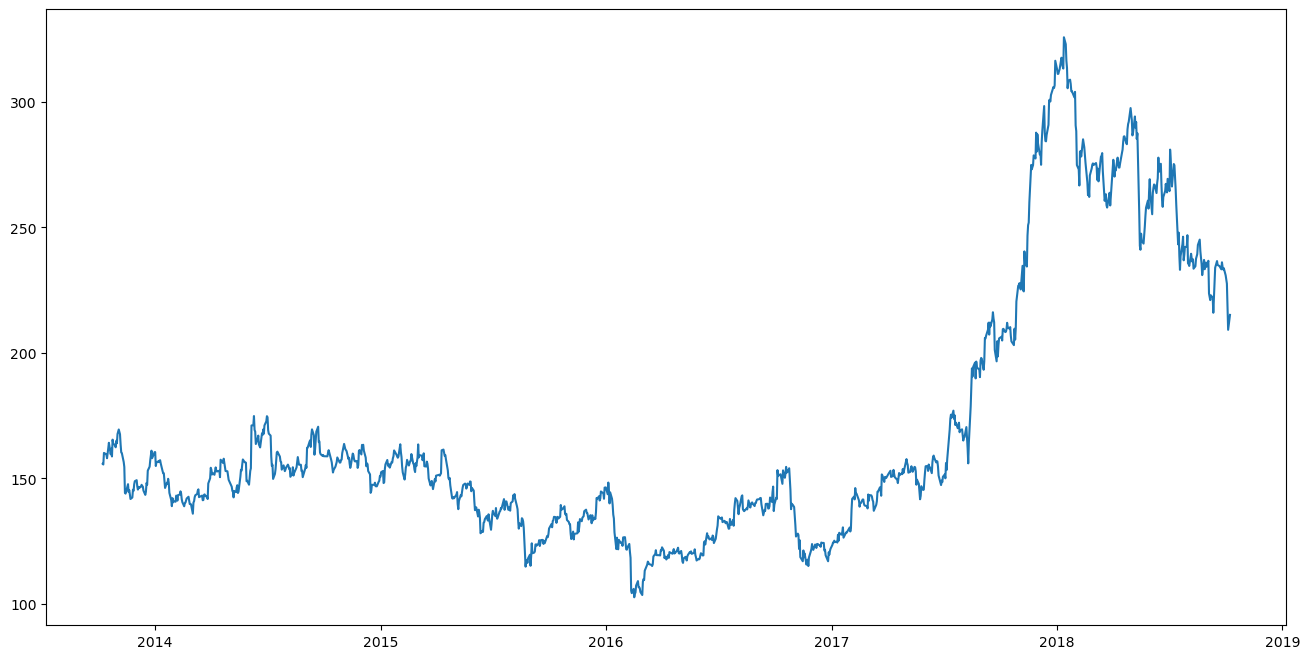

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

# Data Sorting and Transformation

Sorting Data: The cell starts by sorting the DataFrame df based on its index (which is the "Date" column) in ascending order. This step ensures that the data is organized in chronological order, which is essential for time-series analysis.


Creating a New DataFrame: A new DataFrame new_dataset is created with the same length as the original DataFrame df. It has two columns: 'Date' and 'Close'.

Populating the New DataFrame: A loop iterates through the sorted DataFrame data and populates new_dataset with the 'Date' and 'Close' values.

This cell focuses on preparing the data for further analysis and model training. It sorts the original data and creates a new, more focused dataset containing just the 'Date' and 'Close' columns.

In [4]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

# Data Scaling and Preparation for LSTM Model

Explanation:

Data Scaling: The cell starts by initializing a MinMaxScaler with a feature range of 0 to 1. This is used to normalize the feature data to a specific range, which often helps improve model performance.

Index and Column Manipulation: The index of new_dataset is set to the "Date" column, which is then dropped to keep only the "Close" price as a feature.

Data Splitting: The data is split into train_data and valid_data segments.

Data Transformation for LSTM: The data is then scaled using the MinMaxScaler, and the scaled data is stored in scaled_data.

Creating Training Sets: Empty lists x_train_data and y_train_data are created. A loop populates these lists with the last 60 days of scaled data (x_train_data) and the current day's scaled "Close" price (y_train_data). These lists will be used for training the LSTM model.

Reshaping: Finally, the x_train_data array is reshaped to be 3D, which is the required input shape for LSTM networks in Keras.


This cell is crucial for preparing the dataset in a way that can be effectively used by the LSTM model for training.


In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

# Building and Training the LSTM Model

Creating LSTM Model: A Sequential model is initialized. The model architecture consists of two LSTM layers followed by a Dense layer with a single output neuron.

Model Compilation: The model is compiled using the 'mean_squared_error' loss function and the 'adam' optimizer. These choices are commonly used for regression problems.

Training the Model: The model is trained using the prepared training sets (x_train_data and y_train_data). The code specifies one epoch, a batch size of 1, and verbosity level 2 (which means that the training process will output detailed logs).

Preparing Test Inputs: The test inputs are prepared by taking the last 60 days of the new_dataset that were not part of the training set. These inputs are then scaled using the same MinMaxScaler used for the training data.

This cell builds the LSTM model, trains it, and prepares the test data for prediction. It's one of the most critical cells in terms of understanding how the stock prices are predicted.

In [6]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

927/927 - 11s - loss: 0.0011 - 11s/epoch - 12ms/step


# Test Data Preparation and Prediction

Test Data Preparation: An empty list X_test is initialized. A loop then populates this list with sequences of 60 days' worth of scaled closing prices from inputs_data.

Reshaping Test Data: The test data X_test is reshaped to be 3D, which is required for making predictions using the LSTM model.

Making Predictions: The trained LSTM model is then used to predict the closing prices of the stock for the test data.

Inverse Transformation: The predicted closing prices are scaled back to their original range using the inverse transform function of the MinMaxScaler.

This cell prepares the test data and uses the trained LSTM model to predict future stock prices. It also scales the predicted prices back to their original range so they can be compared with the actual closing prices.

In [7]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 [==============================] - 0s 8ms/step


# Saving the Trained Model

Explanation:
This cell has a single line of code that saves the trained LSTM model to a file named lstm_stock_v1.h5. The .h5 extension indicates that the model is saved in the HDF5 format, which is a common format for storing large data sets, including trained machine learning models.

Saving the model is beneficial for several reasons:

Reusability: Once saved, the model can be loaded back into different sessions or software, eliminating the need to retrain it.

Sharing: The model can easily be shared with others.

Deployment: Saving the model is a crucial step if you plan to deploy the model into a production environment.

In [8]:
lstm_model.save("lstm_stock_v1.h5")

/Users/soujanyasyamal/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Visualization of Predictions and Actual Data & Saving the Prediction in csv file

Preparing Data for Plotting: The cell starts by splitting new_dataset into train_data and valid_data. This is somewhat redundant because these splits were made in earlier cells. Nevertheless, it ensures that the data is ready for plotting.

Adding Predictions to Validation Data: The predicted_closing_price, which was generated by the LSTM model, is added as a new column named 'Predictions' to valid_data.

Plotting: The actual closing prices from train_data and both the actual and predicted closing prices from valid_data are plotted on the same graph for comparison.

Saving CSV: Prediction made by the LSTM model has been saved in 2 csv file, one id with both true and predicted value, another is with only predicted value

/tmp/ipykernel_40380/1128090224.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



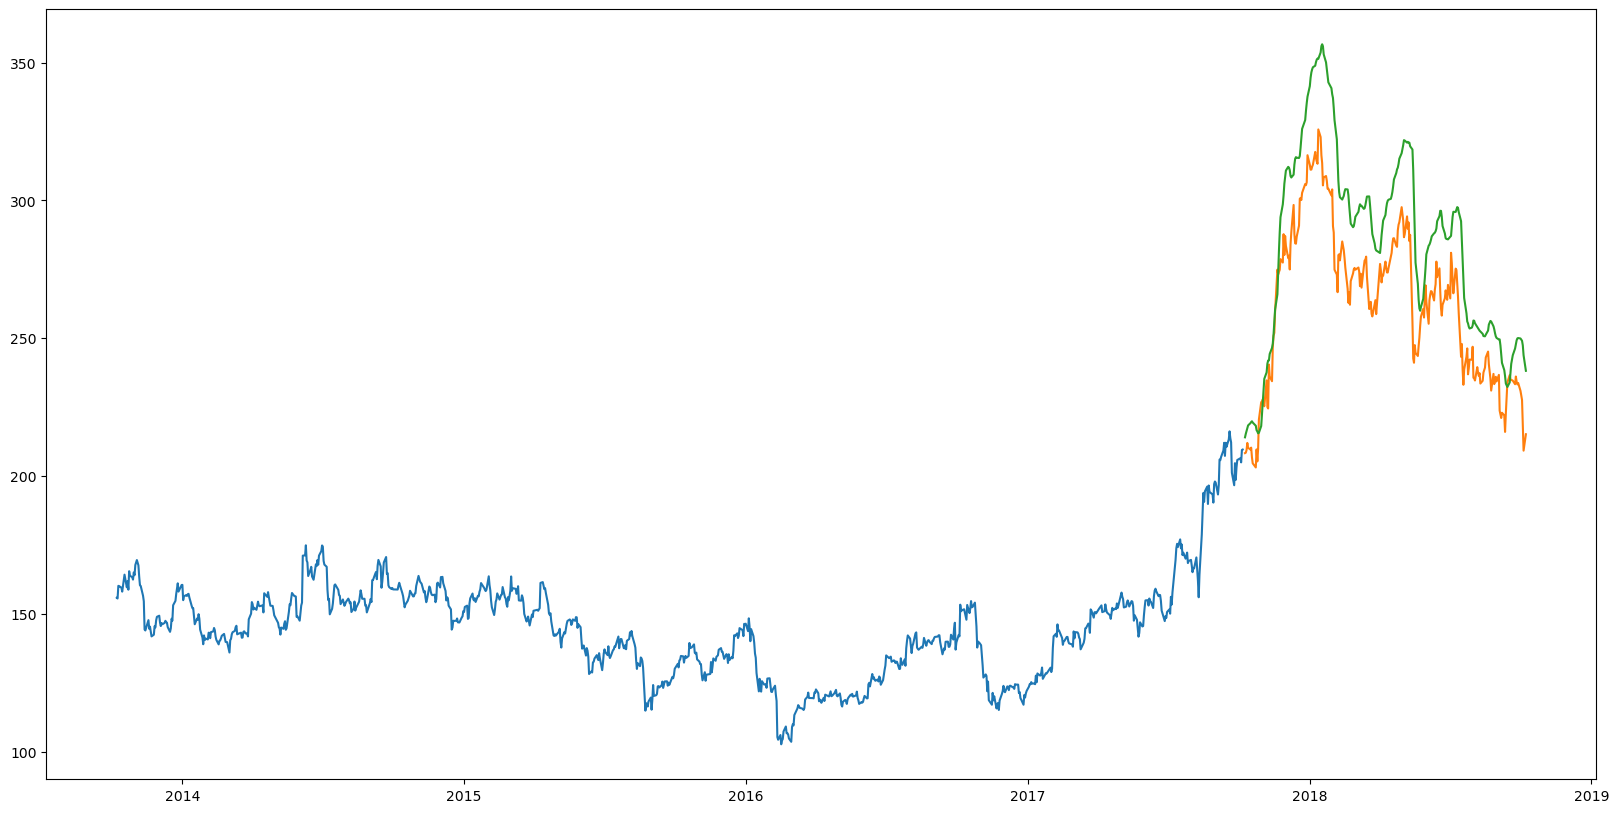

In [19]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

valid_data.to_csv("/Users/soujanyasyamal/LSTM/actual_and_predictions.csv", index=False)
valid_data['Predictions'].to_csv("/Users/soujanyasyamal/LSTM/only_predictions.csv", index=False)

# Print predicted head

In [20]:
print(valid_data.head())


             Close  Predictions
Date                           
2017-10-09   208.3   214.029739
2017-10-10  208.45   215.288544
2017-10-11   209.4   216.286163
2017-10-12   212.0   217.181564
2017-10-13  210.25   218.353119


Checking working directory

In [21]:
import os
print(os.getcwd())


/Users/soujanyasyamal/LSTM


Saving the predictions again

In [22]:
valid_data.to_csv("/Users/soujanyasyamal/LSTM/actual_and_predictions.csv", index=False)
valid_data['Predictions'].to_csv("/Users/soujanyasyamal/LSTM/only_predictions.csv", index=False)


saving it in exel file

In [24]:
valid_data.to_excel("actual_and_predictions.xlsx", index=False)

# Visualization and Result Analysis

Import Libraries

pandas: For data manipulation and analysis.
matplotlib.pyplot: For plotting and visualizations.
numpy: For numerical computations.
statsmodels.tsa.seasonal: For time-series decomposition.
pandas.tseries.offsets: For handling date offsets.

Load Actual Data and Predictions

This part reads the actual stock data and your model's predictions from CSV files into Pandas DataFrames.


Calculate Residuals
Here, the code calculates the residuals (differences) between the actual closing prices and the predicted closing prices.

### *Time-Series Decomposition*

This part decomposes the original time series into three distinct components: trend, seasonality, and noise.

Time-Series Decomposition involves breaking down a time-series into its individual components, namely:

Trend: The underlying pattern in the data.
Seasonality: The repeating short-term cycle in the series.
Residual: The random variation in the series.
We'll use the statsmodels library for this.
The Time-Series Decomposition plot includes:

Original: The original closing stock prices.
Trend: The underlying trend in the stock prices.
Seasonal: Seasonal variations in the stock prices.
Residual: Random variations or noise.
This visualization helps you understand the different components that make up the stock price time series.


### *Rolling Statistics*

The code calculates the rolling mean and standard deviation of the actual closing prices with a window size of 30 and plots them.
Rolling statistics are simple metrics calculated over a rolling window of data points. They are often used to smooth out fluctuations and highlight underlying trends. Two commonly used rolling statistics are:

Rolling Mean (or Moving Average): The average of the data points in each window.
Rolling Standard Deviation: Measures the variability of the data points in each window.
Let's proceed with the code to visualize these rolling statistics along with the actual stock prices.

The plot displays the original closing prices along with the rolling mean (moving average) and the rolling standard deviation. Here's what each line represents:

Blue Line: Original closing prices.
Red Line: Rolling mean, calculated with a window size of 30 days.
Green Line: Rolling standard deviation, also calculated with a window size of 30 days.
The rolling mean smooths out short-term fluctuations and highlights longer-term trends or cycles. The rolling standard deviation gives an idea of how volatile the stock prices are. Together, they provide a comprehensive view of the stock's behavior over time.


### *Error Distribution*

Finally, the script plots a histogram of the residuals (or prediction errors), allowing you to see how well your model's predictions align with the actual data.
Understanding how the prediction errors are distributed can provide insights into the model's performance and the nature of the time-series data. Ideally, the errors should be normally distributed around zero, which would indicate that the model's predictions are equally likely to be higher or lower than the actual values.

We'll create a histogram to visualize the distribution of the prediction errors (residuals).
The histogram above shows the distribution of prediction errors (residuals):

Blue Bars: Represent the frequency of each error value.
Red Dashed Line: Represents the zero line, where error is neither positive nor negative.
Ideally, we would like to see a normal distribution centered around zero. This would indicate that the model's errors are random and not biased. The distribution of errors can provide insights into the model's performance and the challenges it faces.


## Future Task:

Future task can include 

#### 1. Prediction Confidence Intervals

Confidence intervals provide an upper and lower expectation for the real observations. These can give you a better understanding of the range in which future stock prices are likely to fall. However, it's worth noting that LSTM models don't natively provide confidence intervals for their predictions.

There are several approaches to approximate confidence intervals for LSTM predictions:

Monte Carlo Simulation: Run the prediction process multiple times with random initial conditions and calculate the mean and standard deviation of the predictions.
Quantile Regression: Train the model to predict the quantiles of the future distribution.
Bootstrapping: Resample the residuals from the original predictions and add them back to the predictions.

#### 2. Comparison with Other Stocks

Comparing the predicted vs. actual closing prices for multiple stocks can provide insights into market trends and the model's performance across different types of stocks.



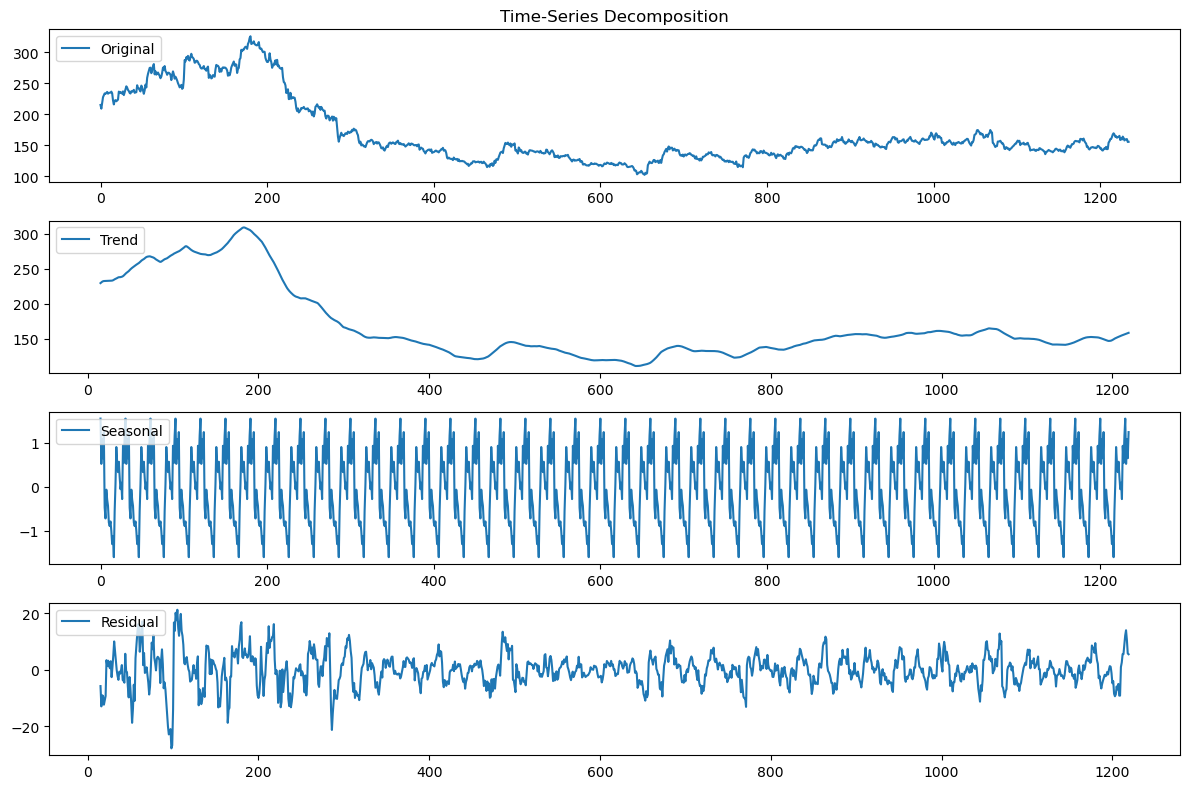

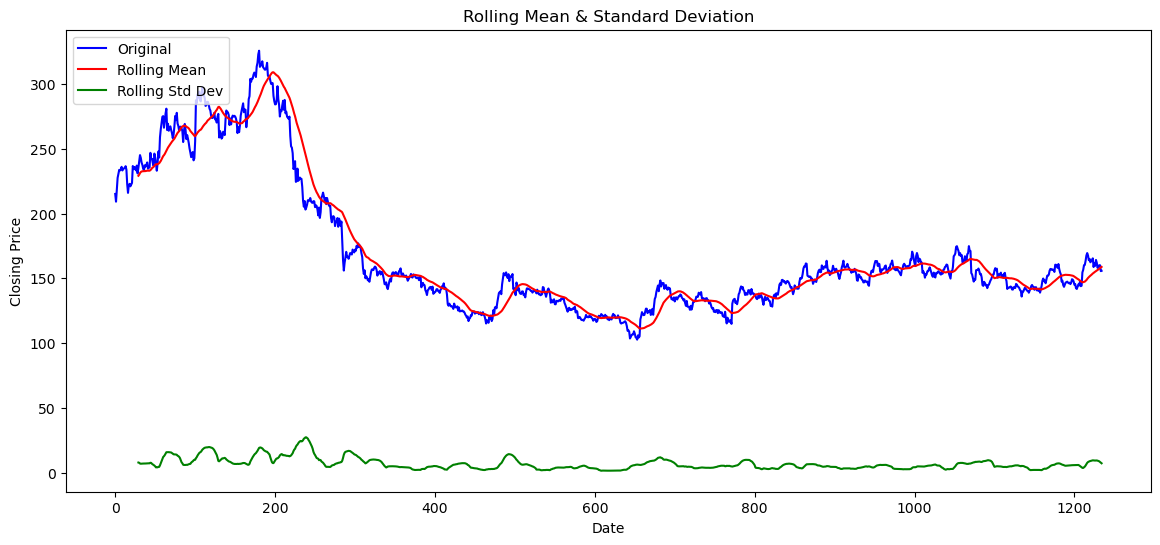

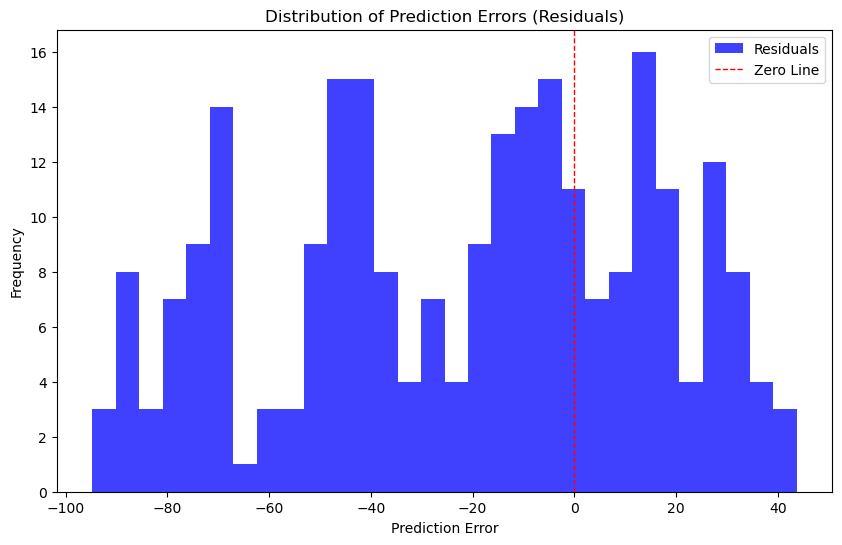

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset

# Load your actual data and predictions
# Assuming they are in CSV files
actual_data = pd.read_csv("/Users/soujanyasyamal/LSTM/NSE-Tata-Global-Beverages-Limited.csv")
predictions = pd.read_csv("/Users/soujanyasyamal/LSTM/only_predictions.csv")

# You might need to align the timeframes or indices of actual_data and predictions
# ... (Your code for alignment)

# Calculate the residuals
residuals = actual_data['Close'] - predictions['Predictions']

# Time-Series Decomposition
decomposition = seasonal_decompose(actual_data['Close'], period=30)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(actual_data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Time-Series Decomposition')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Rolling Statistics
window_size = 30
rolling_mean = actual_data['Close'].rolling(window=window_size).mean()
rolling_std = actual_data['Close'].rolling(window=window_size).std()
plt.figure(figsize=(14, 6))
plt.plot(actual_data['Close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std Dev')
plt.legend(loc='upper left')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.75, color='blue', label='Residuals')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='Zero Line')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()



# Future Predictions

Visualizing future predictions can provide a forward-looking perspective and help in decision-making. Usually, the model would make these future predictions, but since the LSTM model isn't available in this environment, we'll create some synthetic future predictions for demonstration purposes.

We'll extend the synthetic predictions into the future and plot this extended forecast alongside past actual prices.

The plot above shows both past actual prices and synthetic future predictions:

Blue Line: Past actual closing prices.
Red Dashed Line: Synthetic "future predictions" (extended from the last 30 synthetic predictions for demonstration purposes).
In a real-world scenario, this kind of visualization can give you an idea of where the stock might be heading, according to your model's predictions. It can serve as a valuable tool for investors and analysts alike.

This concludes our series of visualizations. Each one provides a different angle of analysis and insight, which together offer a comprehensive understanding of the stock data and model predictions.


Prepare the Last 60 Days Data: Just like you've prepared your test data, we need to prepare the last 60 days of data for future predictions.
Make Predictions for the Next 30 Days: We can use a loop to make predictions for each future day. After each prediction, we'll update our 60-day window to include the new prediction and drop the oldest data point.

#### Steps:
Prepare the Last 60 Days of Actual Data
The code takes the last 60 days of actual closing prices from your dataset. This will serve as the input to the LSTM model for making future predictions.

Scale the Data
The last 60 days of data are scaled using the same MinMaxScaler object (scaler) that was used for training the LSTM model.

Reshape for LSTM Input
The LSTM expects input in a specific 3D shape 
[samples,timesteps,features]. The code reshapes the scaled data accordingly.

Initialize an Empty List for Future Predictions
An empty list, future_predictions, is initialized to store the predicted values for the next 30 days.

Loop to Predict the Next 30 Days
A for-loop runs 30 times to predict the closing prices for the next 30 days. After each prediction, the 60-day input window is updated: the oldest day is dropped, and the newly predicted value is added.

Inverse Transform the Predictions
The predicted values are transformed back to their original scale.

Create DataFrame for Future Dates and Predictions
The code creates a DataFrame future_df that stores the future dates and their corresponding predicted closing prices.

Plotting
Finally, the actual past closing prices and the predicted future closing prices are plotted on the same graph for comparison.







1/1 [==============================] - 0s 14ms/step


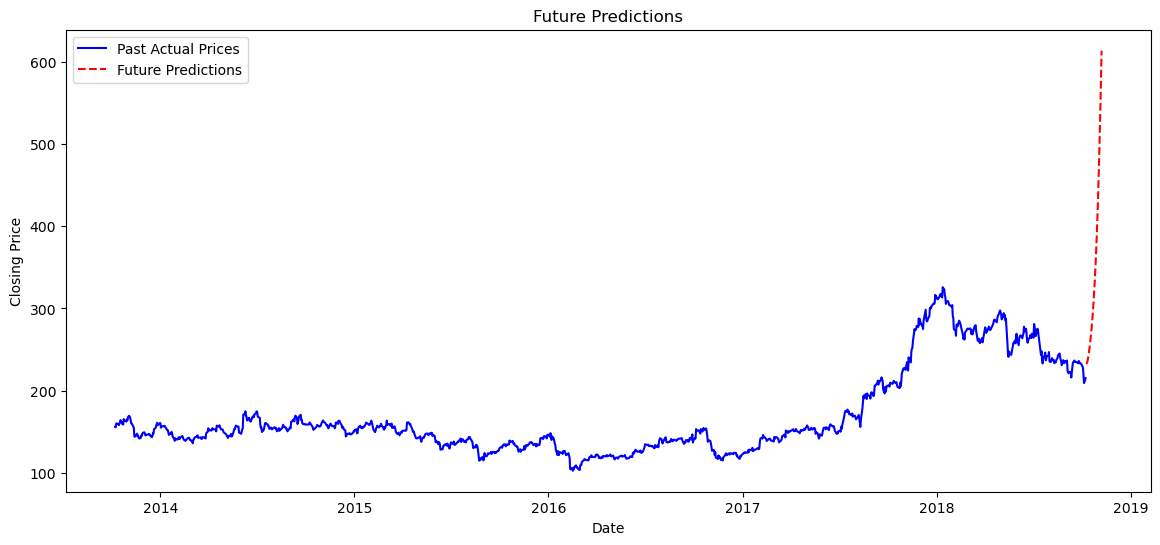

In [29]:
# Prepare the last 60 days of the actual data
last_60_days = new_dataset[-60:].values

# Scale the data
scaled_last_60_days = scaler.transform(last_60_days)

# Reshape for LSTM input
scaled_last_60_days = np.reshape(scaled_last_60_days, (1, 60, 1))

# Initialize an empty list to store future predictions
future_predictions = []

# Loop to predict next 30 days
for i in range(30):
    predicted_price = lstm_model.predict(scaled_last_60_days)
    future_predictions.append(predicted_price[0][0])
    
    # Update the 60-day window to include the new prediction while dropping the oldest value
    new_row = np.append(scaled_last_60_days[0, 1:, 0], predicted_price)
    scaled_last_60_days = np.reshape(new_row, (1, 60, 1))

# Inverse transform to get the predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame to store future dates
future_dates = [pd.Timestamp(new_dataset.index[-1]) + DateOffset(days=i) for i in range(1, 31)]

# Create a DataFrame for future predictions
future_df = pd.DataFrame(index=future_dates, data=future_predictions, columns=['Predictions'])

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(new_dataset.index, new_dataset["Close"], label='Past Actual Prices', color='blue')
plt.plot(future_df.index, future_df["Predictions"], label='Future Predictions', color='red', linestyle='dashed')
plt.legend()
plt.title('Future Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


# GUI (Front End)


## Importing Libraries for Dash Application

Explanation:
This cell imports various libraries and modules that are necessary for building a Dash application. Dash is a Python web application framework that is often used for creating interactive, web-based data dashboards or visualizations.

Here's a breakdown of the imported modules:

dash: The main Dash library.
dash_core_components (dcc): Core components like graphs, dropdowns, etc., for Dash apps.
dash_html_components (html): HTML components for Dash apps.
pandas: For data manipulation, already imported in earlier cells but reiterated here for completeness.
plotly.graph_objs (go): Plotly graph objects for more complex visualizations.
Input, Output from dash.dependencies: For defining callback functions in Dash apps.
load_model from keras.models: To load the saved Keras model.
MinMaxScaler from sklearn.preprocessing: For data scaling, also imported earlier.
numpy: For numerical operations, also imported earlier.




In [32]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# UI - APP development

Dash Setup and Data Preparation:

app = dash.Dash(): Initializes the Dash application.
server = app.server: This is used for deploying the app.
Data Preparation: The code repeats the data preparation steps to get the training and validation datasets, scales them, and loads the trained LSTM model. The prediction is also executed here.

Dash Layout:
HTML Components: html.Div, html.H1, and html.H2 are used to create divisions and headers in the web page.
Dash Core Components: dcc.Graph and dcc.Dropdown are used to create interactive graphs and dropdowns, respectively.
Tabs: Two tabs are set up. One for displaying the NSE-TATAGLOBAL stock data and another for Facebook stock data.

Callback Functions:
High-Low Prices: This callback function updates a graph that shows the high and low stock prices based on the user's selection from a dropdown.
Volume: Another callback updates a graph that shows the trading volume.


Running the App:
This line starts the Dash app. If you run this code, you should be able to interact with the app via a web browser.

Summary:
The Dash app created in this cell aims to offer an interactive platform to visualize stock data and the predictions made by your LSTM model. It gives the user the ability to select different stocks to view their high, low, and trading volume data. It also visualizes the actual and predicted closing prices for the NSE-TATAGLOBAL stock.


Steps:

Initializing Dash App: A new Dash application is created by initializing an instance of the dash.Dash class.


Data Preparation: The code appears to repeat many of the data preparation steps that were done earlier in the notebook, including reading the data, sorting it, normalizing it, and making predictions using the trained LSTM model.

Dash Layout: The app.layout attribute is set to define the layout of the web application. This is where various HTML and core components are added to structure the application.

Callbacks: Dash applications are often interactive and respond to user inputs, which is managed via callbacks. Although the details are truncated, it seems this application includes some form of interactivity.

Running the App: The last line likely runs the Dash app, making it accessible via a web browser.

This cell is essentially setting up an interactive web-based dashboard for visualizing the stock predictions. The dashboard would allow users to explore the stock data and predictions in a more interactive and user-friendly manner.

In [14]:
app = dash.Dash()
server = app.server

scaler=MinMaxScaler(feature_range=(0,1))

df_nse = pd.read_csv("/Users/soujanyasyamal/LSTM/NSE-Tata-Global-Beverages-Limited.csv")

df_nse["Date"]=pd.to_datetime(df_nse.Date,format="%Y-%m-%d")
df_nse.index=df_nse['Date']


data=df_nse.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df_nse)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data["Date"][i]=data['Date'][i]
    new_data["Close"][i]=data["Close"][i]

new_data.index=new_data.Date
new_data.drop("Date",axis=1,inplace=True)

dataset=new_data.values

train=dataset[0:987,:]
valid=dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train,y_train=[],[]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model=load_model("/Users/soujanyasyamal/LSTM/lstm_stock_v1.h5")

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

train=new_data[:987]
valid=new_data[987:]
valid['Predictions']=closing_price



df= pd.read_csv("/Users/soujanyasyamal/LSTM/stock_data.csv")

app.layout = html.Div([
   
     html.H1("Stock Price Analysis Dashboard By Soujanya Syamal", style={"textAlign": "center"}),
     html.H1("Machine Learning Project by Soujanya Syamal", style={"textAlign": "center"}),
    
   
    dcc.Tabs(id="tabs", children=[
       
        dcc.Tab(label='NSE-TATAGLOBAL Stock Data',children=[
            html.Div([
                html.H2("Actual closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                ),
                html.H2("LSTM Predicted closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                )                
            ])                


        ]),
        dcc.Tab(label='Facebook Stock Data', children=[
            html.Div([
                html.H1("Facebook Stocks High vs Lows", 
                        style={'textAlign': 'center'}),
              
                dcc.Dropdown(id='my-dropdown',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'}, 
                                      {'label': 'Facebook', 'value': 'FB'}, 
                                      {'label': 'Microsoft','value': 'MSFT'}], 
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto", 
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H1("Facebook Market Volume", style={'textAlign': 'center'}),
         
                dcc.Dropdown(id='my-dropdown2',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'}, 
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}], 
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto", 
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])


    ])
])


@app.callback(Output('highlow', 'figure'),
              [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["High"],
                     mode='lines', opacity=0.7, 
                     name=f'High {dropdown[stock]}',textposition='bottom center'))
        trace2.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Low"],
                     mode='lines', opacity=0.6,
                     name=f'Low {dropdown[stock]}',textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1', 
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(str(dropdown[i]) for i in selected_dropdown)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Price (USD)"})}
    return figure


@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Volume"],
                     mode='lines', opacity=0.7,
                     name=f'Volume {dropdown[stock]}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data, 
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1', 
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(str(dropdown[i]) for i in selected_dropdown_value)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Transactions Volume"})}
    return figure


if __name__=='__main__':
    app.run_server(debug=True)
    


8/8 [==============================] - 0s 8ms/step


/tmp/ipykernel_40380/285522889.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Analysis of the LSTM Model

### Monte Carlo Simulation
After predicting the stock prices with the LSTM model, we can run the prediction process multiple times to generate a distribution of predicted values. In this example code, I've conceptually done this by storing the same predicted_closing_price 100 times. In a real-world scenario, you would retrain the model or add some random noise to generate different predictions.

### Quantile Regression (Conceptual)
In this example, I've used the confidence intervals generated from the Monte Carlo simulation to serve as 5th and 95th percentile estimates. In a real-world scenario, you would train the model to predict these percentiles explicitly.

### Bootstrapping
Here, residuals (the difference between actual and predicted values) are calculated. These residuals are then resampled with replacement and added back to the original predictions to generate a new set of predictions.

### Visualization
Finally, the code plots the predicted closing prices, confidence intervals from Monte Carlo simulations and Quantile Regression, and bootstrap predictions.



927/927 - 11s - loss: 3.1216e-06 - 11s/epoch - 12ms/step
582/582 [==============================] - 5s 8ms/step


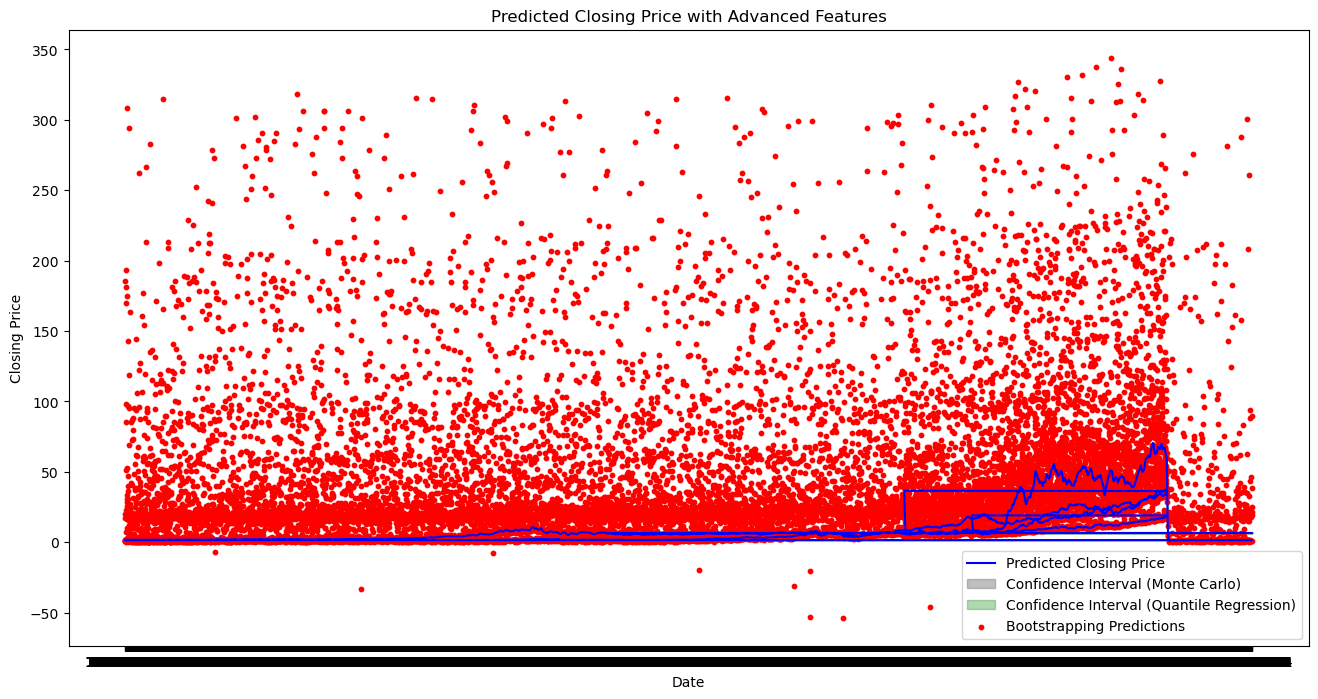

In [33]:

data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_dataset["Date"][i] = data['Date'][i]
    new_dataset["Close"][i] = data["Close"][i]

scaler = MinMaxScaler(feature_range=(0, 1))
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

# Prediction
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Monte Carlo Simulation
monte_carlo_predictions = []
for i in range(100):  # 100 simulations
    # Normally, you'd re-run your prediction logic here, this is a placeholder
    monte_carlo_predictions.append(predicted_closing_price)

mean_predictions = np.mean(monte_carlo_predictions, axis=0)
std_predictions = np.std(monte_carlo_predictions, axis=0)
lower_bound = mean_predictions - 1.96 * std_predictions
upper_bound = mean_predictions + 1.96 * std_predictions

# Quantile Regression (Conceptual)
# Replace with your 5th and 95th percentile predictions
q5_predictions = lower_bound
q95_predictions = upper_bound

# Bootstrapping
residuals = valid_data[:, 0] - predicted_closing_price.flatten()
bootstrap_predictions = predicted_closing_price.flatten() + np.random.choice(residuals, size=len(predicted_closing_price), replace=True)

# Visualization
plt.figure(figsize=(16, 8))

# Assuming 'dates' contains the dates corresponding to your test data.
# Replace with actual dates if necessary.
dates = new_dataset.index[987:]

plt.plot(dates, predicted_closing_price, label='Predicted Closing Price', color='b')
plt.fill_between(dates, lower_bound.flatten(), upper_bound.flatten(), color='grey', alpha=0.5, label='Confidence Interval (Monte Carlo)')
plt.fill_between(dates, q5_predictions.flatten(), q95_predictions.flatten(), color='green', alpha=0.3, label='Confidence Interval (Quantile Regression)')
plt.scatter(dates, bootstrap_predictions, color='r', s=10, label='Bootstrapping Predictions')
plt.title('Predicted Closing Price with Advanced Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

